In [3]:
path='D:\Evancer\Python\Projects\caravan-insurance-challenge-Ka/caravan-insurance-challenge.csv'

In [2]:
import numpy as np
import pandas as pd

In [4]:
car_all=pd.read_csv(path)

In [4]:
corr_matrix = car_all.corr().style.background_gradient()
corr_matrix

In [5]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]
                
                
                
                
                
    return dataset

In [6]:
selected_data=correlation(car_all, 0.25)

In [7]:
selected_data.shape

(9822, 33)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
car_test=selected_data[selected_data['ORIGIN']=='test']
car_train=selected_data[selected_data['ORIGIN']=='train']

In [10]:
car_test.shape

(4000, 33)

In [14]:
car_train.shape

(5822, 32)

In [11]:
car_test.drop('ORIGIN',axis=1,inplace=True)
car_train.drop('ORIGIN',axis=1,inplace=True)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
x_train=car_train.drop('CARAVAN',axis=1)
y_train=car_train["CARAVAN"]

In [13]:
x_test=car_test.drop('CARAVAN',axis=1)
y_test=car_test["CARAVAN"]

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
params={'class_weight':['balanced'],
        'penalty':['l1','l2'],
        'C':np.linspace(0.001,1000,50)
       }

In [23]:
clf=LogisticRegression()

In [31]:
random_search=RandomizedSearchCV(clf, cv=10, param_distributions=params,
                    scoring='roc_auc',n_iter=10, n_jobs=-1,
                    verbose=False)

In [32]:
random_search.fit(x_train,y_train)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributio...
       7.34694143e+02, 7.55102286e+02, 7.75510429e+02, 7.95918571e+02,
       8.16326714e+02, 8.36734857e+02, 8.57143000e+02, 8.77551143e+02,
       8.97959286e+02, 9.18367429e+02, 9.38775571e+02, 9.59183714e+02,
       9.79591857e+0

In [33]:
logr=random_search.best_estimator_

In [34]:
y_pred=logr.predict(x_test)

In [35]:
print('Metrics of logisticregression')
print("-------------------------------")
print(confusion_matrix(y_test,y_pred))

print(accuracy_score(y_test,y_pred))

print(roc_auc_score(y_test,y_pred))

print(recall_score(y_test,y_pred))

print(precision_score(y_test,y_pred))

print(fbeta_score(y_test,y_pred,2))

Metrics of logisticregression
-------------------------------
[[2487 1275]
 [ 100  138]]
0.65625
0.6204582311393458
0.5798319327731093
0.09766454352441614
0.2917547568710359


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
params={'class_weight':['balanced'],
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50],
        'min_samples_leaf':[1,2,5,10,15],
        'min_samples_split':[2,5,10,15,20],
        "max_features":[2,5,10,15]
}

In [38]:
clf_DT=DecisionTreeClassifier()

In [39]:
random_search=RandomizedSearchCV(clf_DT, cv=10, param_distributions=params,
                    scoring='roc_auc',n_iter=10, n_jobs=-1,
                    verbose=False)

In [40]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [41]:
dtree=random_search.best_estimator_
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
y_pred1=dtree.predict(x_test)

In [43]:
print('Metrics of DecisionTree')
print("-------------------------------")
print(confusion_matrix(y_test,y_pred1))

print(accuracy_score(y_test,y_pred1))

print(roc_auc_score(y_test,y_pred1))

print(recall_score(y_test,y_pred1))

print(precision_score(y_test,y_pred1))

print(fbeta_score(y_test,y_pred1,2))

Metrics of DecisionTree
-------------------------------
[[2434 1328]
 [  88  150]]
0.646
0.638624189707781
0.6302521008403361
0.10148849797023005
0.30864197530864196


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
clf_rf=RandomForestClassifier()

In [45]:
rf = RandomForestClassifier(n_estimators=1000,max_features=20,max_depth=10)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
y_pred2=rf.predict(x_test)

In [48]:
print('Metrics of RF_1')
print("-------------------------------")
print(confusion_matrix(y_test,y_pred2))

print(accuracy_score(y_test,y_pred2))

print(roc_auc_score(y_test,y_pred2))

print(recall_score(y_test,y_pred2))

print(precision_score(y_test,y_pred2))

print(fbeta_score(y_test,y_pred2,2))

Metrics of RF_1
-------------------------------
[[3750   12]
 [ 233    5]]
0.93875
0.5089093053489339
0.02100840336134454
0.29411764705882354
0.025799793601651192


In [49]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
fi = rf_feat_importance(rf, x_train); fi[:10]

,cols,imp
0,MOSTYPE,0.108985
17,PPERSAUT,0.088017
11,MOPLHOOG,0.064533
12,MOPLMIDD,0.061550
14,PWAPART,0.061064
7,MGODGE,0.058132
5,MGODPR,0.058077
13,MINK3045,0.056841
10,MFGEKIND,0.050190
9,MRELOV,0.043058


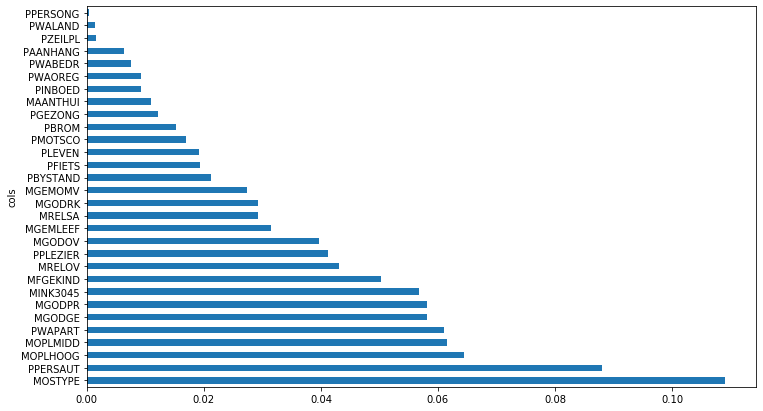

In [51]:
plot_fi(fi[:30])

In [54]:
param_dist = {"n_estimators":[1000],
                "max_features": [5,15,25,30],
                "bootstrap": [True, False],
                "class_weight":["balanced"],
                "criterion":['entropy','gini'],
                "max_depth":[None,5,8,12,15],
                "min_samples_leaf":[1,2,5,10,15],
                "min_samples_split":[2,5,10,15],
                 'max_leaf_nodes':[2,5,10,15]}

In [55]:
n_iter_search=5
random_search=RandomizedSearchCV(clf_rf,param_distributions=param_dist,
                                n_iter=n_iter_search,
                                scoring='roc_auc',
                                cv=10)

In [56]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [57]:
rfc=random_search.best_estimator_
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features=5,
                       max_leaf_nodes=10, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [60]:
y_pred3=rfc.predict(x_test)

In [61]:
print('Metrics of Random_forest')
print("-------------------------------")
print(confusion_matrix(y_test,y_pred3))

print(accuracy_score(y_test,y_pred3))

print(roc_auc_score(y_test,y_pred3))

print(recall_score(y_test,y_pred3))

print(precision_score(y_test,y_pred3))

print(fbeta_score(y_test,y_pred3,2))

Metrics of Random_forest
-------------------------------
[[2666 1096]
 [  99  139]]
0.70125
0.6463496084239118
0.5840336134453782
0.1125506072874494
0.3177869227251943


In [62]:
##Boosting Machines
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
clf_GB=GradientBoostingClassifier()

In [64]:
gbm_params={'n_estimators':[50,100,333,444],
            'learning_rate': [0.001,.005,0.01,0.4,0.8,1],
            'max_depth':[1,2,3,4,5,6],
            'subsample':[0.5,0.8,1],
            'max_features':[5,10,15,20,24]
            }

In [70]:
random_search=RandomizedSearchCV(clf_GB,scoring='roc_auc',
                                param_distributions=gbm_params,random_state=42,
                                cv=10,n_iter=10,
                                n_jobs=-1,verbose=False)

In [71]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [72]:
GBM=random_search.best_estimator_
GBM.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=1,
                           max_features=24, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [73]:
y_pred4=GBM.predict(x_test)

In [74]:
print('Metrics of GradientBoosting')
print("-------------------------------")
print(confusion_matrix(y_test,y_pred4))

print(accuracy_score(y_test,y_pred4))

print(roc_auc_score(y_test,y_pred4))

print(recall_score(y_test,y_pred4))

print(precision_score(y_test,y_pred4))

print(fbeta_score(y_test,y_pred4,2))

Metrics of Random_forest
-------------------------------
[[3761    1]
 [ 236    2]]
0.94075
0.504068772644624
0.008403361344537815
0.6666666666666666
0.010471204188481676


In [75]:
##XGBOOST
from xgboost.sklearn import XGBClassifier

In [77]:
clf_XB=XGBClassifier()

In [76]:
param_dist_XBG = {
              "max_depth": [2,3,4,5,6],
              "learning_rate":[0.01,0.05,0.1,0.3,0.5],
    "min_child_weight":[4,5,6],
              "subsample":[i/10.0 for i in range(6,10)],
 "colsample_bytree":[i/10.0 for i in range(6,10)],
               "reg_alpha":[1e-5, 1e-2, 0.1, 1,5,10],
              "gamma":[i/10.0 for i in range(2,10)],
    "n_estimators":[100,333,500,700,999],
    'scale_pos_weight':[2,3,4,5,6,7,8,9]
    
              }

In [79]:
n_iter=10

random_search=RandomizedSearchCV(clf_XB,scoring='roc_auc',
                                param_distributions=param_dist_XBG,
                                cv=10,n_iter=10,
                                n_jobs=-1,verbose=False)

In [80]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=...
                                        'gamma': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                                  0.8, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
 

In [81]:
XBM=random_search.best_estimator_
XBM.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.9,
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=6, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=8, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [89]:
y_pred5=XBM.predict(x_test)

In [90]:
print('Metrics of XGBOOST')
print("-------------------------------")
print(confusion_matrix(y_test,y_pred5))

print(accuracy_score(y_test,y_pred5))

print(roc_auc_score(y_test,y_pred5))

print(recall_score(y_test,y_pred5))

print(precision_score(y_test,y_pred5))

print(fbeta_score(y_test,y_pred5,2))

Metrics of Random_forest
-------------------------------
[[3330  432]
 [ 157   81]]
0.85275
0.612751799284307
0.3403361344537815
0.15789473684210525
0.2764505119453925


In [91]:
##MLPClassifier

from sklearn.neural_network import MLPClassifier

In [92]:
clf_NN=MLPClassifier()

In [93]:
parameters={'learning_rate': ["constant", "invscaling", "adaptive"],
            'hidden_layer_sizes': [(12,14,18),(10,9,10),(20,18,14),(16,5,17,20),(22,24,28)],
            'alpha': [0.3,.1,.01,0.2,0.5],
            'activation': ["logistic","relu",]
            }

In [94]:
random_search=RandomizedSearchCV(clf_NN,n_iter=10,cv=10,param_distributions=parameters,
                scoring='roc_auc',random_state=42,n_jobs=-1,verbose=False)

In [96]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=200, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           ran...
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'relu'],
                                        'alpha': [0

In [97]:
NN=random_search.best_estimator_
NN.fit(x_train,y_train)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 9, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [98]:
y_pred6=NN.predict(x_test)

In [102]:
print('Metrics of Neural Network')
print("-------------------------------")
print(confusion_matrix(y_test,y_pred6))

print(accuracy_score(y_test,y_pred6))

print(roc_auc_score(y_test,y_pred6))

print(recall_score(y_test,y_pred6))

print(precision_score(y_test,y_pred6))

print(fbeta_score(y_test,y_pred6,2))

Metrics of Neural Network
-------------------------------
[[3762    0]
 [ 238    0]]
0.9405
0.5
0.0
0.0
0.0


C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [100]:
MLPClassifier(activation='relu', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))

In [101]:
clf_MLP.fit(x_train,y_train)
y_pred_MLP = clf_MLP.predict(x_test)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [103]:
print('Metrics of Neural Networks')
print("-------------------------------")
print(confusion_matrix(y_test,y_pred_MLP))

print(accuracy_score(y_test,y_pred_MLP))

print(roc_auc_score(y_test,y_pred_MLP))

print(recall_score(y_test,y_pred_MLP))

print(precision_score(y_test,y_pred_MLP))

print(fbeta_score(y_test,y_pred_MLP,2))

Metrics of Neural Networks
-------------------------------
[[3732   30]
 [ 229    9]]
0.93525
0.514920322195864
0.037815126050420166
0.23076923076923078
0.04540867810292634


In [104]:
##Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [105]:
gnb=GaussianNB()

In [107]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [108]:
y_pred7=gnb.predict(x_test)

In [109]:
print('Metrics of Naive Bayes')
print("-------------------------------")
print(confusion_matrix(y_test,y_pred7))

print(accuracy_score(y_test,y_pred7))

print(roc_auc_score(y_test,y_pred7))

print(recall_score(y_test,y_pred7))

print(precision_score(y_test,y_pred7))

print(fbeta_score(y_test,y_pred7,2))

Metrics of Naive Bayes
-------------------------------
[[1050 2712]
 [  29  209]]
0.31475
0.578629059279214
0.8781512605042017
0.07155083875385142
0.26981667957655564


In [110]:
##svm
from sklearn import svm

In [121]:
svc=svm.SVC(kernel='linear',C=1,gamma='auto',class_weight='balanced',random_state=42)

In [122]:
svc.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [123]:
y_pred8=svc.predict(x_test)

In [124]:
print('Metrics of SVM')
print("-------------------------------")
print(confusion_matrix(y_test,y_pred8))

print(accuracy_score(y_test,y_pred8))

print(roc_auc_score(y_test,y_pred8))

print(recall_score(y_test,y_pred8))

print(precision_score(y_test,y_pred8))

print(fbeta_score(y_test,y_pred8,2))

Metrics of SVM
-------------------------------
[[1969 1793]
 [  67  171]]
0.535
0.6209396039117402
0.7184873949579832
0.08706720977596741
0.29320987654320985


In [127]:
clf.svm=svm.SVC(C=10, class_weight='balanced', gamma='auto', kernel='rbf',
              max_iter=-1, probability=True, random_state=42, verbose=True)

In [128]:
clf.svm.fit(x_train,y_train)

[LibSVM]

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

In [129]:
y_pred9=svc.predict(x_test)

In [130]:
print('Metrics of SVM')
print("-------------------------------")
print(confusion_matrix(y_test,y_pred9))

print(accuracy_score(y_test,y_pred9))

print(roc_auc_score(y_test,y_pred9))

print(recall_score(y_test,y_pred9))

print(precision_score(y_test,y_pred9))

print(fbeta_score(y_test,y_pred9,2))

Metrics of SVM
-------------------------------
[[1969 1793]
 [  67  171]]
0.535
0.6209396039117402
0.7184873949579832
0.08706720977596741
0.29320987654320985


In [133]:
pd.DataFrame(y_pred3).to_csv("Akash_Sriram_P2_part2.csv",index=False)

In [14]:
##KNN
pd.DataFrame(y_test).to_csv("y_test.csv",index=False)